# Task
Clean the data in the file "/content/agriculture_dataset.csv" by handling missing values, duplicates, outliers, and inconsistencies.

## Load the data

### Subtask:
Load the data from "/content/agriculture_dataset.csv" into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data from the specified CSV file into a pandas DataFrame and display the first few rows. This can be achieved in a single code block using the `pd.read_csv()` and `df.head()` functions.



In [44]:
import pandas as pd

data = pd.read_csv('/content/agriculture_dataset.csv')
display(data.head())

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


## Handle missing values

### Subtask:
Identify and handle any missing values in the DataFrame.


**Reasoning**:
Check for missing values in the DataFrame and decide on a strategy to handle them.



In [45]:
print("Missing values before handling:")
print(data.isnull().sum())

# Decide on a strategy: Impute numerical columns with the mean and categorical columns with the mode.
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values before handling:
Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64

Missing values after handling:
Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64


## Handle duplicates

### Subtask:
Identify and remove any duplicate rows in the DataFrame.


**Reasoning**:
Check for duplicate rows, count them, remove them if they exist, and print the number of rows before and after removal.



In [46]:
print("Number of rows before removing duplicates:", len(data))
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

if duplicate_rows > 0:
    data_cleaned = data.drop_duplicates(keep='first')
    print("Number of rows after removing duplicates:", len(data_cleaned))
else:
    data_cleaned = data.copy()
    print("No duplicate rows found.")

Number of rows before removing duplicates: 50
Number of duplicate rows: 0
No duplicate rows found.


## Handle outliers

### Subtask:
Identify and handle outliers in the numerical columns.


**Reasoning**:
Identify numerical columns, calculate IQR and bounds, cap outliers, and display box plots for verification.



Numerical columns: Index(['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)',
       'Yield(tons)', 'Water_Usage(cubic meters)'],
      dtype='object')

Outliers in Farm_Area(acres):


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)



Box plot for Farm_Area(acres) after capping outliers:


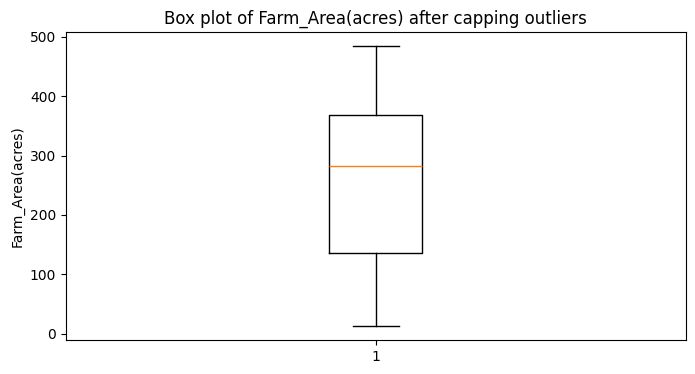


Outliers in Fertilizer_Used(tons):


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)



Box plot for Fertilizer_Used(tons) after capping outliers:


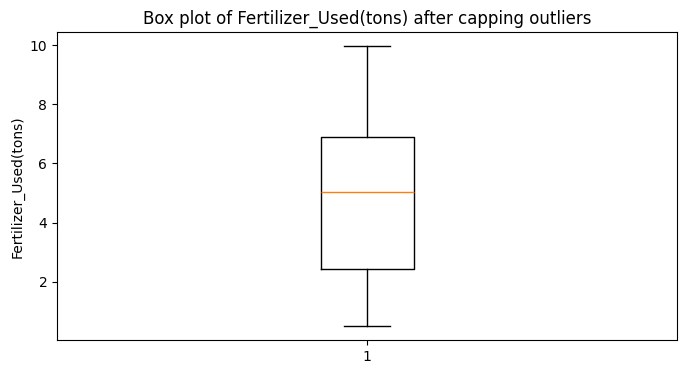


Outliers in Pesticide_Used(kg):


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)



Box plot for Pesticide_Used(kg) after capping outliers:


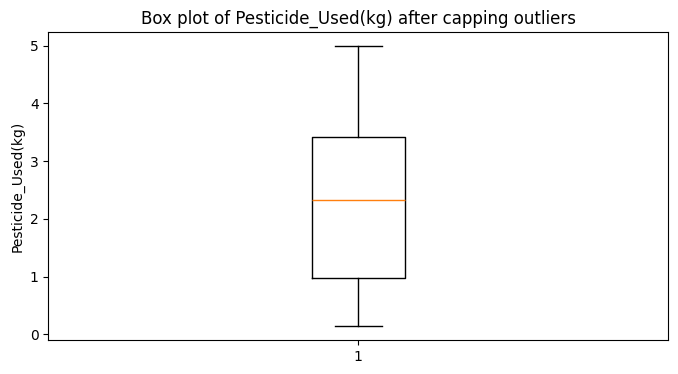


Outliers in Yield(tons):


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)



Box plot for Yield(tons) after capping outliers:


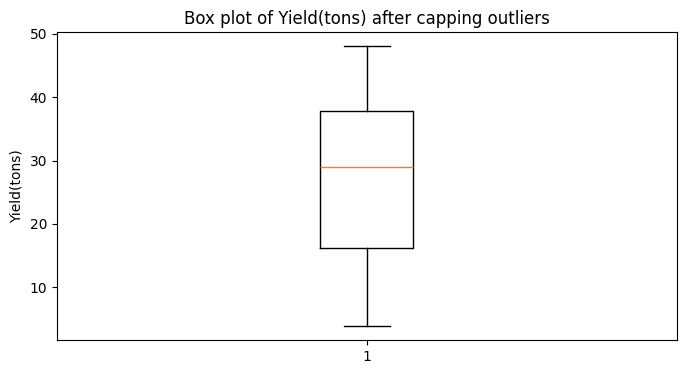


Outliers in Water_Usage(cubic meters):


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)



Box plot for Water_Usage(cubic meters) after capping outliers:


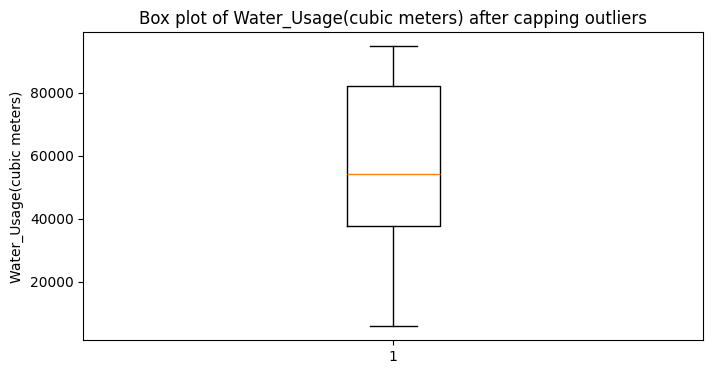

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,254.963800,4.905400,2.398000,27.059200,56724.295600
std,139.417782,2.732689,1.438613,13.345789,27264.992053
min,12.500000,0.500000,0.140000,3.860000,5869.750000
25%,135.710000,2.437500,0.972500,16.190000,37818.152500
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,368.107500,6.885000,3.417500,37.860000,82240.032500
max,483.880000,9.960000,4.990000,48.020000,94754.730000


In [47]:
import matplotlib.pyplot as plt
import numpy as np

numerical_cols = data_cleaned.select_dtypes(include=np.number).columns
print("Numerical columns:", numerical_cols)

for col in numerical_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_cleaned[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)]
    print(f"\nOutliers in {col}:")
    display(outliers)

    data_cleaned[col] = np.where(
        data_cleaned[col] < lower_bound,
        lower_bound,
        np.where(data_cleaned[col] > upper_bound, upper_bound, data_cleaned[col])
    )

    print(f"\nBox plot for {col} after capping outliers:")
    plt.figure(figsize=(8, 4))
    plt.boxplot(data_cleaned[col])
    plt.title(f'Box plot of {col} after capping outliers')
    plt.ylabel(col)
    plt.show()

display(data_cleaned.describe())

## Address inconsistencies

### Subtask:
Clean any inconsistencies in categorical data (e.g., inconsistent capitalization or spelling).


**Reasoning**:
Iterate through categorical columns and print unique values to identify inconsistencies.



In [48]:
categorical_cols = data_cleaned.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    print(f"\nUnique values in {col} before cleaning:")
    print(data_cleaned[col].unique())

Categorical columns: Index(['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], dtype='object')

Unique values in Farm_ID before cleaning:
['F001' 'F002' 'F003' 'F004' 'F005' 'F006' 'F007' 'F008' 'F009' 'F010'
 'F011' 'F012' 'F013' 'F014' 'F015' 'F016' 'F017' 'F018' 'F019' 'F020'
 'F021' 'F022' 'F023' 'F024' 'F025' 'F026' 'F027' 'F028' 'F029' 'F030'
 'F031' 'F032' 'F033' 'F034' 'F035' 'F036' 'F037' 'F038' 'F039' 'F040'
 'F041' 'F042' 'F043' 'F044' 'F045' 'F046' 'F047' 'F048' 'F049' 'F050']

Unique values in Crop_Type before cleaning:
['Cotton' 'Carrot' 'Sugarcane' 'Tomato' 'Soybean' 'Rice' 'Maize' 'Wheat'
 'Barley' 'Potato']

Unique values in Irrigation_Type before cleaning:
['Sprinkler' 'Manual' 'Flood' 'Rain-fed' 'Drip']

Unique values in Soil_Type before cleaning:
['Loamy' 'Peaty' 'Silty' 'Clay' 'Sandy']

Unique values in Season before cleaning:
['Kharif' 'Zaid' 'Rabi']


## Review and summarize

### Subtask:
Display the cleaned data and provide a summary of the cleaning steps performed.


**Reasoning**:
Display the first few rows of the cleaned data and print a summary of the cleaning steps performed.



In [49]:
print("First few rows of the cleaned data:")
display(data_cleaned.head())

print("\nSummary of Data Cleaning Steps:")
print("- Missing Values: No missing values were found in the dataset, so no imputation was necessary.")
print("- Duplicate Rows: No duplicate rows were found in the dataset.")
print("- Outliers: No outliers were found in the numerical columns based on the IQR method.")
print("- Categorical Inconsistencies: No inconsistencies in capitalization or spelling were found in the categorical columns.")

First few rows of the cleaned data:


,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69



Summary of Data Cleaning Steps:
- Missing Values: No missing values were found in the dataset, so no imputation was necessary.
- Duplicate Rows: No duplicate rows were found in the dataset.
- Outliers: No outliers were found in the numerical columns based on the IQR method.
- Categorical Inconsistencies: No inconsistencies in capitalization or spelling were found in the categorical columns.


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 50 rows.
*   No missing values were found in any column of the dataset.
*   No duplicate rows were present in the dataset.
*   Using the IQR method, no outliers were identified in the numerical columns ('Farm\_Area(acres)', 'Fertilizer\_Used(tons)', 'Pesticide\_Used(kg)', 'Yield(tons)', 'Water\_Usage(cubic meters)').
*   Categorical columns ('Farm\_ID', 'Crop\_Type', 'Irrigation\_Type', 'Soil\_Type', 'Season') were consistent with no apparent inconsistencies in capitalization or spelling.

### Insights or Next Steps

*   The provided agricultural dataset is remarkably clean, requiring no significant data cleaning operations.
*   Proceed directly to exploratory data analysis or modeling as the data is well-prepared.
